In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn import preprocessing as prep

In [113]:
df = pd.read_csv("aac_shelter_outcomes.csv")
df.head(20)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male
6,1 year,A693700,Other,Squirrel Mix,Tan,2013-12-13T00:00:00,2014-12-13T12:20:00,2014-12-13T12:20:00,NaN,Suffering,Euthanasia,Unknown
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23T00:00:00,2014-12-08T15:55:00,2014-12-08T15:55:00,*Ella,Partner,Transfer,Spayed Female
8,1 month,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16T00:00:00,2014-08-14T18:45:00,2014-08-14T18:45:00,Lucy,NaN,Adoption,Intact Female
9,3 months,A678580,Cat,Domestic Shorthair Mix,White/Black,2014-03-26T00:00:00,2014-06-29T17:45:00,2014-06-29T17:45:00,*Frida,Offsite,Adoption,Spayed Female


In [114]:
#check the unique values of outcome_type
df["outcome_type"].unique()

array(['Transfer', 'Adoption', 'Euthanasia', 'Return to Owner', 'Died',
       'Disposal', 'Relocate', 'Missing', nan, 'Rto-Adopt'], dtype=object)

# Convert outcome_type data

In [115]:
#convert the data into two categories: 1 == adopted, 0 == not adopted
df["outcome_type"].replace({"Transfer": 0, "Adoption": 1, "Euthanasia": 0, "Return to Owner": 0,
                            "Died": 0, "Disposal": 0, "Relocate": 0, "Missing": 0, 
                            "nan": 0, "Rto-Adopt": 0}, inplace = True)

In [116]:
df.head(20)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,0.0,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,0.0,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,1.0,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,0.0,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,0.0,Unknown
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,0.0,Intact Male
6,1 year,A693700,Other,Squirrel Mix,Tan,2013-12-13T00:00:00,2014-12-13T12:20:00,2014-12-13T12:20:00,NaN,Suffering,0.0,Unknown
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23T00:00:00,2014-12-08T15:55:00,2014-12-08T15:55:00,*Ella,Partner,0.0,Spayed Female
8,1 month,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16T00:00:00,2014-08-14T18:45:00,2014-08-14T18:45:00,Lucy,NaN,1.0,Intact Female
9,3 months,A678580,Cat,Domestic Shorthair Mix,White/Black,2014-03-26T00:00:00,2014-06-29T17:45:00,2014-06-29T17:45:00,*Frida,Offsite,1.0,Spayed Female


# Handle Missing Values

In [117]:
#checking for missing values
df.isnull().sum()

age_upon_outcome        8
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23886
outcome_subtype     42293
outcome_type           12
sex_upon_outcome        2
dtype: int64

In [118]:
df["outcome_type"].fillna(df['outcome_type'].median(), inplace = True)
#impute missing values in outcome_type by median. is able to do so because it is a continuous variable

In [119]:
df.groupby(["name"]).agg(['mean', 'count'])
df.groupby(['name']).agg({'name':'count'})
df['name'].fillna('Zuzu', inplace = True)
#fill in missing values by using group_by. can use it because it is a discrete variable

In [120]:
#check missing values again
df.isnull().sum()

age_upon_outcome        8
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                    0
outcome_subtype     42293
outcome_type            0
sex_upon_outcome        2
dtype: int64

In [121]:
df.groupby(['outcome_subtype']).agg(['mean','count'])
df.groupby(['outcome_subtype']).agg({'outcome_subtype':'count'})
df['outcome_subtype'].fillna('Partner', inplace = True)
#fill in missing values by using group_by. can use it because it is a discrete variable

In [122]:
#check missing values again
df.isnull().sum()

age_upon_outcome    8
animal_id           0
animal_type         0
breed               0
color               0
date_of_birth       0
datetime            0
monthyear           0
name                0
outcome_subtype     0
outcome_type        0
sex_upon_outcome    2
dtype: int64

In [123]:
df.groupby(['sex_upon_outcome']).agg(['mean', 'count'])
df.groupby(['sex_upon_outcome']).agg({'sex_upon_outcome':'count'})
df['sex_upon_outcome'].fillna('Neutered Male', inplace = True)
#fill in missing values by using group_by. can use it because it is a discrete variable

In [124]:
df.isnull().sum()
#no more missing values

age_upon_outcome    8
animal_id           0
animal_type         0
breed               0
color               0
date_of_birth       0
datetime            0
monthyear           0
name                0
outcome_subtype     0
outcome_type        0
sex_upon_outcome    0
dtype: int64

# Check For Outliers

### There are no outliers because all of the columns are of an object type except for the outcome_type column which was changed in the beginning. Outliers cannot be found in a discrete variable. Outcome_type cannot have any outliers because values can only be 0 or 1.

# Visualizing the data and checking distributions

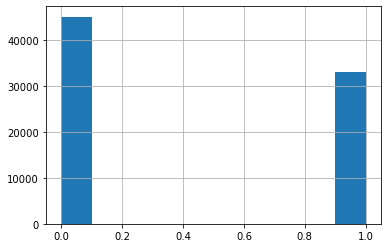

In [125]:
#age_upon_outcome
df['outcome_type'].hist()

### Can only visualize outcome_type because it is the only column that has numeric data. The other columns cannot be visualized because they are discrete variables and hold no numeric values to visualize. No need to scale or transform this data

# Choosing features as predictors

In [126]:
#define X and y
X = df[['age_upon_outcome', 'animal_type', 'breed', 'color','sex_upon_outcome']]
y = df['outcome_type']
#choosing age_upon_outcome because the age of the pet matters for adoption
#choosing animal_type because owners might be looking for a specific animal
#choosing breed because owners might be looking for a specific breed
#choosing color because owners might prefer a color
#choosing sex_upon_outcome because owners might prefer a gender
#these features all matter in terms of what type of animal the owner might be looking for

# Naive Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [141]:
label_encode(X, X.columns.values)


<ipython-input-140-6380479ca61b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = col_values_transformed


In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [143]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_pred

array([1., 0., 1., ..., 1., 0., 1.])

In [144]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred))

0.6999105545617174
0.7350588023838753


### The Naive Bayes Model has an accuracy score of 0.6999 and an AUC Score of 0.735


# Support Vector Machines(SVM)

In [155]:
X = df[['age_upon_outcome', 'animal_type', 'breed', 'color','sex_upon_outcome']]
y = df['outcome_type']

In [157]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [158]:
label_encode(X, X.columns.values)

<ipython-input-157-0fee95dc3898>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = col_values_transformed


In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [160]:
from sklearn import svm

# instantiate model
model = svm.SVC() 

# fit model
model.fit(X_train, y_train)

SVC()

In [161]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [162]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred))

0.5842064911832354
0.5


### The Support Vector Machines(SVM) Model has an accuracy score of 0.5842 and an AUC score of 0.5

# K-Nearest Neighbor(KNN)

In [163]:
X = df[['age_upon_outcome', 'animal_type', 'breed', 'color','sex_upon_outcome']]
y = df['outcome_type']

In [164]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [165]:
label_encode(X, X.columns.values)

<ipython-input-164-0fee95dc3898>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = col_values_transformed


In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [167]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate model
model = KNeighborsRegressor(n_neighbors=5)

# fit model
model.fit(X_train, y_train)

KNeighborsRegressor()

In [168]:
y_pred = model.predict(X_test)
y_pred

array([1. , 0. , 1. , ..., 0.6, 0.8, 0.6])

In [178]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred.round()))
print(metrics.roc_auc_score(y_test, y_pred.round()))

0.7464221824686941
0.7401606394928968


### The K-Nearest Neighbor(KNN) Model has an accuracy score of 0.7464 and an AUC score of 0.74016

# Random Forest

In [182]:
X = df[['age_upon_outcome', 'animal_type', 'breed', 'color','sex_upon_outcome']]
y = df['outcome_type']

In [183]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed

In [184]:
label_encode(X, X.columns.values)

<ipython-input-183-0fee95dc3898>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = col_values_transformed


In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [186]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);
y_pred = rf.predict(X_test)

In [187]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred.round()))
print(metrics.roc_auc_score(y_test, y_pred.round()))

0.7464221824686941
0.7401606394928968


### The Random Forest Model has an accuracy score of 0.7464 and an AUC score of 0.74016

## The SVM Model had the lowest accuracy score at 0.5842. The Naive Bayes Model had the third lowest accuracy score at 0.6999. The KNN Model and the Random Forest Model had the highest accuracy scores at 0.7464. The KNN Model and the Random Forest Model performed the best.

### My best models were the KNN Model and the Random Forest Model. Both had the same accuracy scores and AUC scores. AUC is the percentage of the ROC plot that is underneath the curve. The AUC score was 0.74016 which is a fairly good score. It represents the likelihood that the classifier will assign a higher predicted probability to the positive observation. The accuracy score was 0.7464 which means that the model has about 75% correct predictions. The greater the value, the better is the performance of our model. Overall, this isn't a a bad model because the scores are decent but it could still be much more accurate